In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
import yfinance as yf
import datetime as dt

stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.545429,35.424697,26.900123,29.051487,855215656
2007-10-08,30.879324,33.645361,30.685215,33.645361,126671715
2007-10-09,32.982166,33.273327,29.229414,30.895505,116725709
2007-10-10,33.289497,33.968876,32.998337,33.839469,67931378
2007-10-11,37.009907,38.821581,32.998345,38.821581,106320954


In [4]:
df.shape

(4208, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4208 entries, 2007-10-05 to 2024-10-31
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4208 non-null   float64
 1   (High, POWERGRID.NS)    4208 non-null   float64
 2   (Low, POWERGRID.NS)     4208 non-null   float64
 3   (Open, POWERGRID.NS)    4208 non-null   float64
 4   (Volume, POWERGRID.NS)  4208 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 197.2 KB


In [6]:
df.isnull().sum()

,,0
Price,Ticker,
Close,POWERGRID.NS,0
High,POWERGRID.NS,0
Low,POWERGRID.NS,0
Open,POWERGRID.NS,0
Volume,POWERGRID.NS,0


In [7]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4208.000000,4208.000000,4208.000000,4208.000000,4.208000e+03
mean,79.483549,80.517027,78.462750,79.520589,1.188963e+07
std,63.570576,64.313382,62.779670,63.552224,2.061999e+07
min,19.001740,20.312204,17.036043,20.213919,0.000000e+00
25%,36.529125,37.105434,35.989644,36.566530,4.799653e+06
50%,55.504944,56.145823,54.762134,55.611505,8.344398e+06
75%,83.112982,84.105068,82.127445,83.135591,1.362032e+07
max,356.113861,356.893408,348.074624,354.749603,8.552157e+08


In [8]:
df = df.reset_index()

In [9]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [10]:
df.to_csv("powergrid.csv")

In [11]:
data01 = pd.read_csv("powergrid.csv")

In [12]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.54542922973633,35.424697482052096,26.900123201294626,29.0514868911543,855215656
2,1,2007-10-08,30.879323959350586,33.64536052774602,30.68521528319679,33.64536052774602,126671715
3,2,2007-10-09,32.9821662902832,33.27332717981798,29.229413747593593,30.89550520408466,116725709
4,3,2007-10-10,33.28949737548828,33.96887558934333,32.9983365375293,33.83946906605695,67931378


In [13]:
# Candlesticks
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'],
                                    high = data01['High'],
                                    low = data01['Low'],
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [14]:
df = df.drop(['Date', 'Adj Close'], axis = 1)

<ipython-input-14-8e9e58ec18af>:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



KeyError: 'Adj Close'

In [15]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,2007-10-05,32.545429,35.424697,26.900123,29.051487,855215656
1,2007-10-08,30.879324,33.645361,30.685215,33.645361,126671715
2,2007-10-09,32.982166,33.273327,29.229414,30.895505,116725709
3,2007-10-10,33.289497,33.968876,32.998337,33.839469,67931378
4,2007-10-11,37.009907,38.821581,32.998345,38.821581,106320954


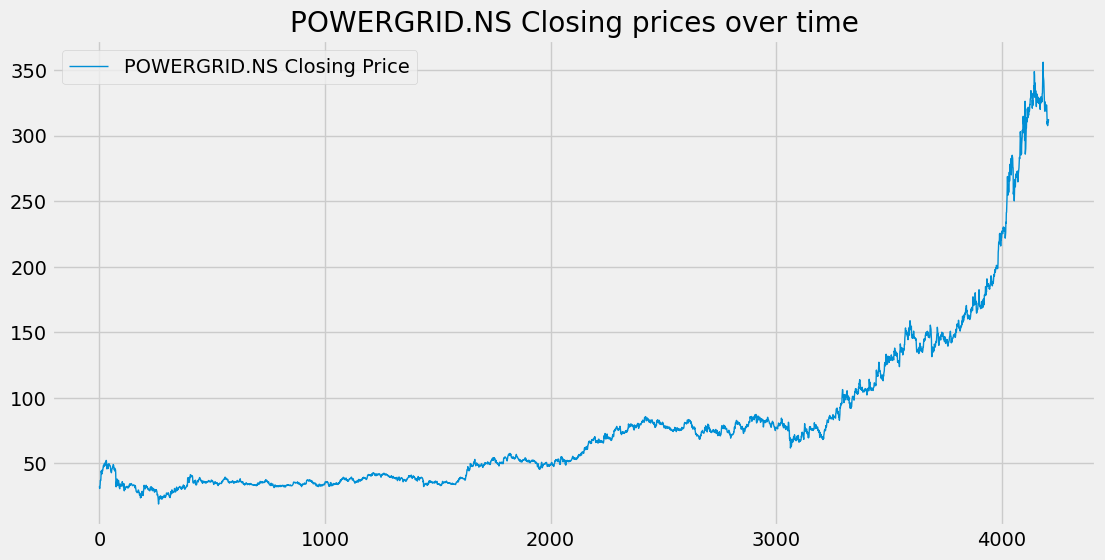

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

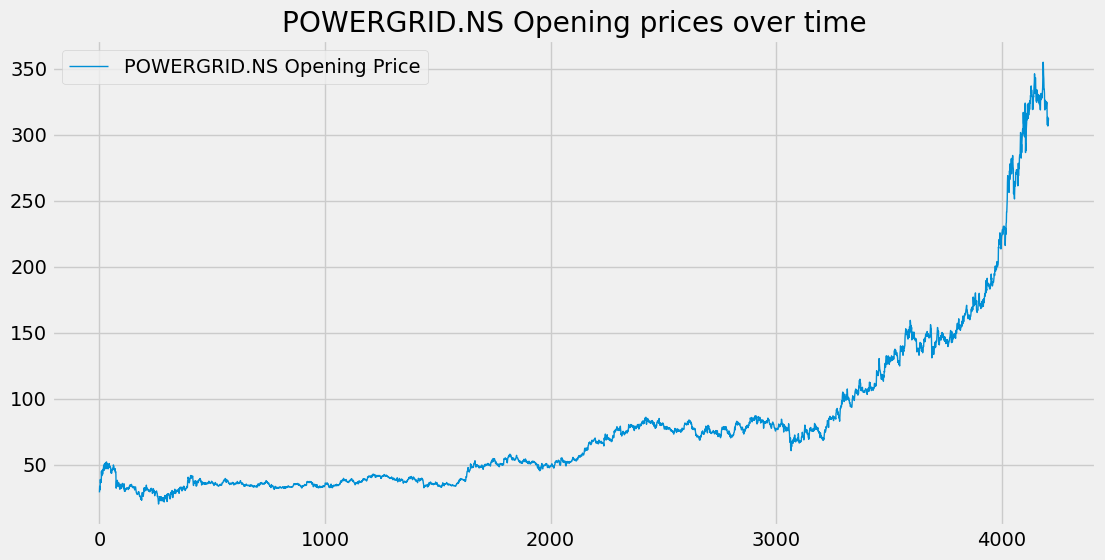

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

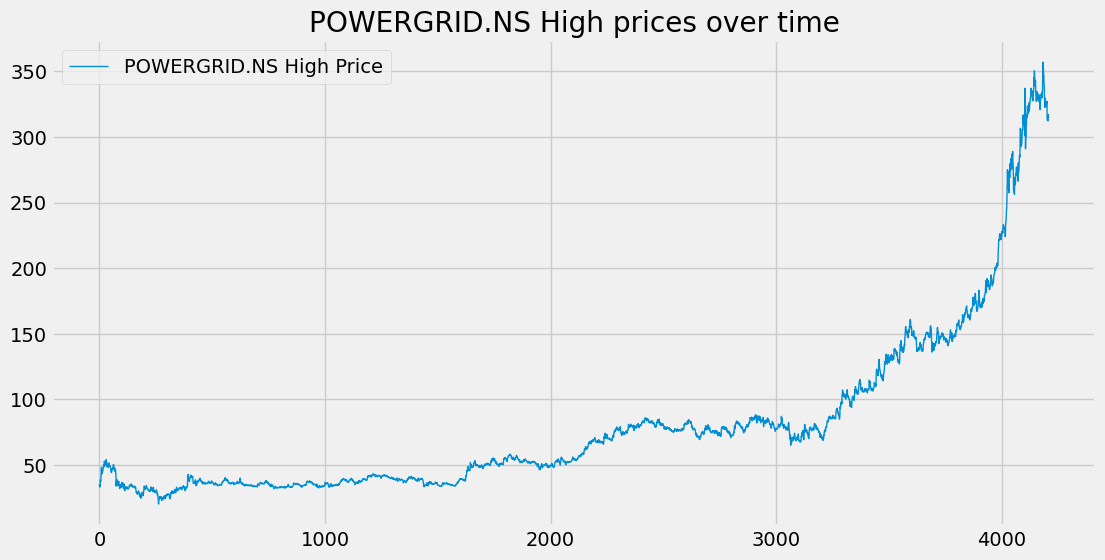

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

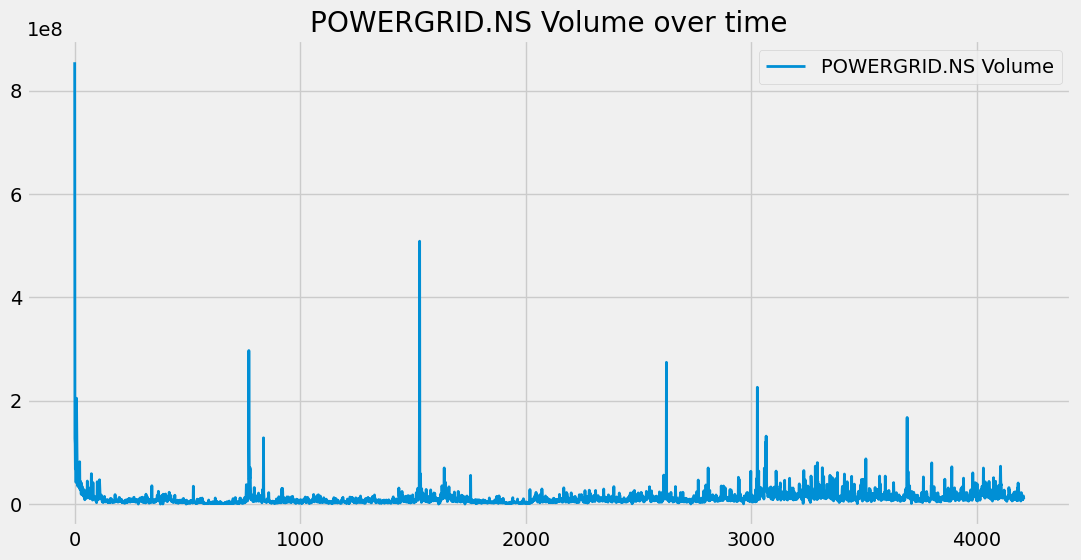

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [20]:
# Moving Average
# [10, 20, 30, 40, 50, 60, 70, 80, 90]
# moving average for last 5 days -> null null null null 30.0 40.0 50.0

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [21]:
import pandas as pd
df01 = pd.DataFrame(temp_data)

In [22]:
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [23]:
ma100 = df.Close.rolling(100).mean()

In [24]:
ma100

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4203,324.993564
4204,325.235134
4205,325.471087
4206,325.670631


In [25]:
ma200 = df.Close.rolling(200).mean()

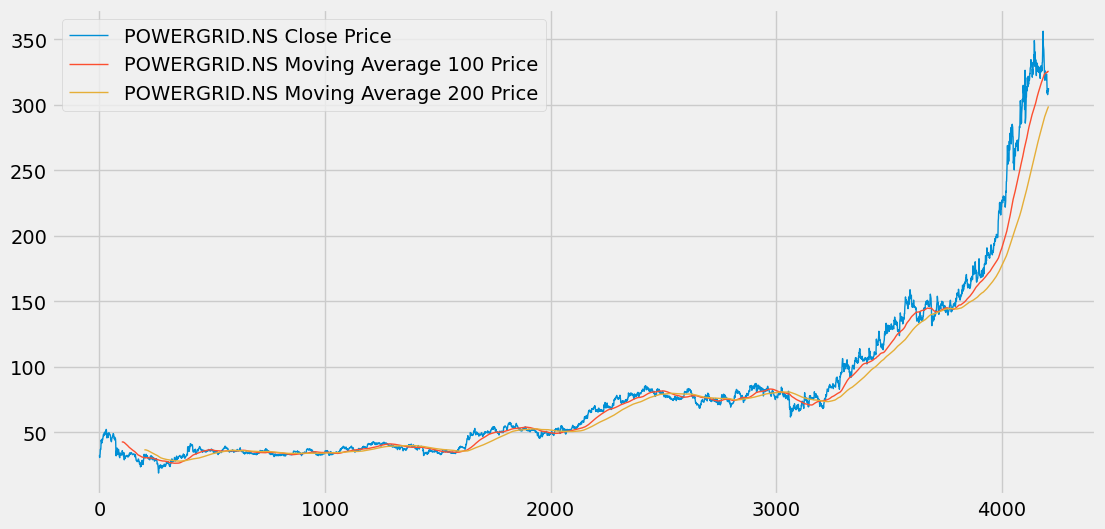

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [27]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()

In [28]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

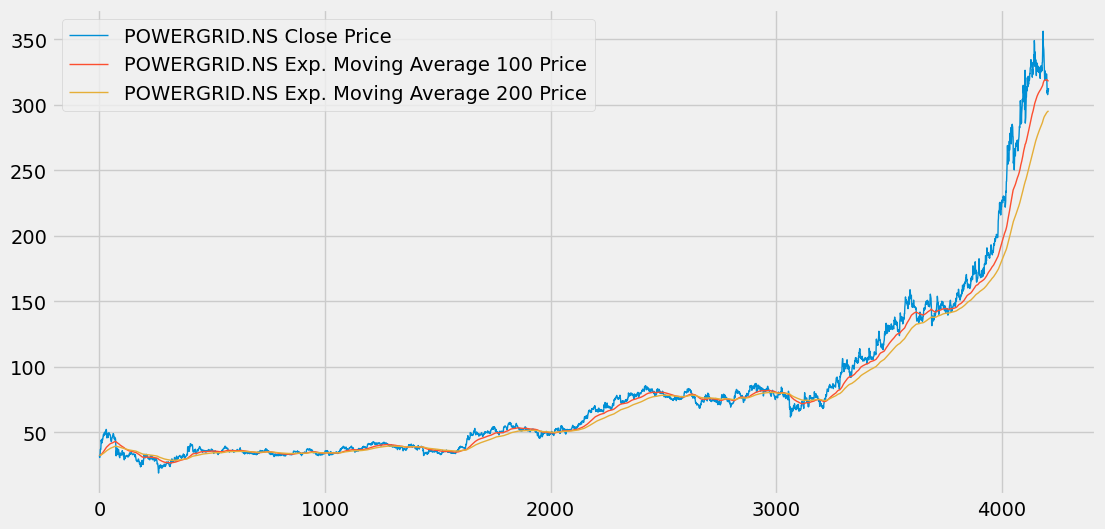

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [30]:
# Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [31]:
data_training.shape

(2945, 1)

In [32]:
data_testing.shape

(1263, 1)

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [34]:
data_training_array = scaler.fit_transform(data_training)

In [35]:
data_training_array

array([[0.19808603],
       [0.17371807],
       [0.20447362],
       ...,
       [0.9077443 ],
       [0.86000365],
       [0.87299653]])

In [36]:
data_training_array.shape[0]

2945

In [37]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [38]:
x_train.shape

(2845, 100, 1)

In [39]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [40]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 32s 277ms/step - loss: 0.0923
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 279ms/step - loss: 0.0091
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 274ms/step - loss: 0.0069
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 277ms/step - loss: 0.0070
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 278ms/step - loss: 0.0063
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 277ms/step - loss: 0.0060
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 278ms/step - loss: 0.0064
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 279ms/step - loss: 0.0053
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 279ms/step - loss: 0.0054
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 40s 269ms/step - loss: 0.0042
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 42s 279ms/step - loss: 0.0046
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 280ms/step - loss: 0.0044
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 40s 268ms/step - loss: 0.0045
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 42s 279ms/step - loss: 0.0037
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 

In [43]:
past_100_days = data_training.tail(100)

In [47]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [48]:
final_df.head()

Ticker,POWERGRID.NS
0,76.105637
1,77.657150
2,77.922531
3,77.759216
4,78.208351


In [49]:
input_data = scaler.fit_transform(final_df)

In [50]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [51]:
x_test.shape

(1263, 100, 1)

In [52]:
y_predicted = model.predict(x_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step


In [53]:
y_predicted.shape

(1263, 1)

In [54]:
scaler.scale_

array([0.00339719])

In [55]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

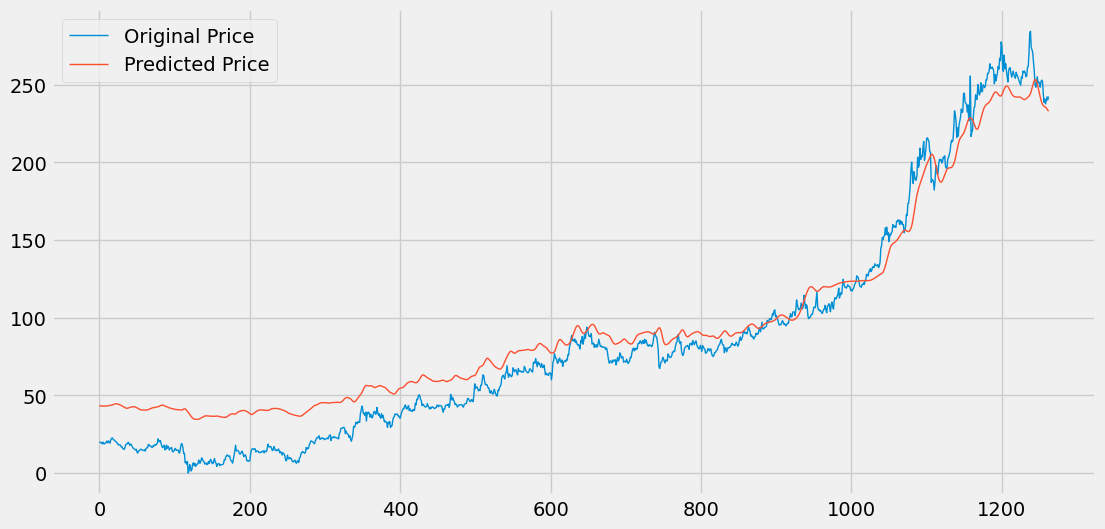

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [57]:
model.save('stock_dl_model.h5')